# Logistic Regrassion Project 

Checking for severe heart condition in patients !




## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

-------------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Model Parameter

In [7]:
X = df.drop('target',axis=1)

### Prediction Parameter

In [8]:
y = df['target']

### Analysis of data 

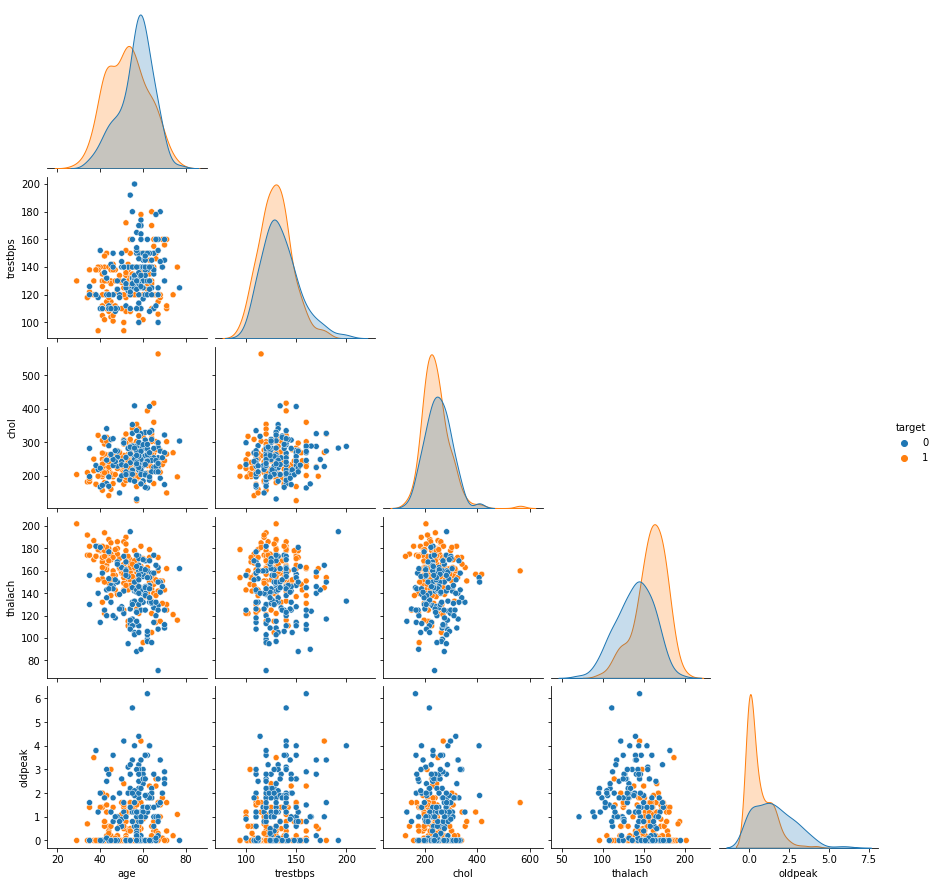

In [9]:
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak','target']],hue='target',corner=True);

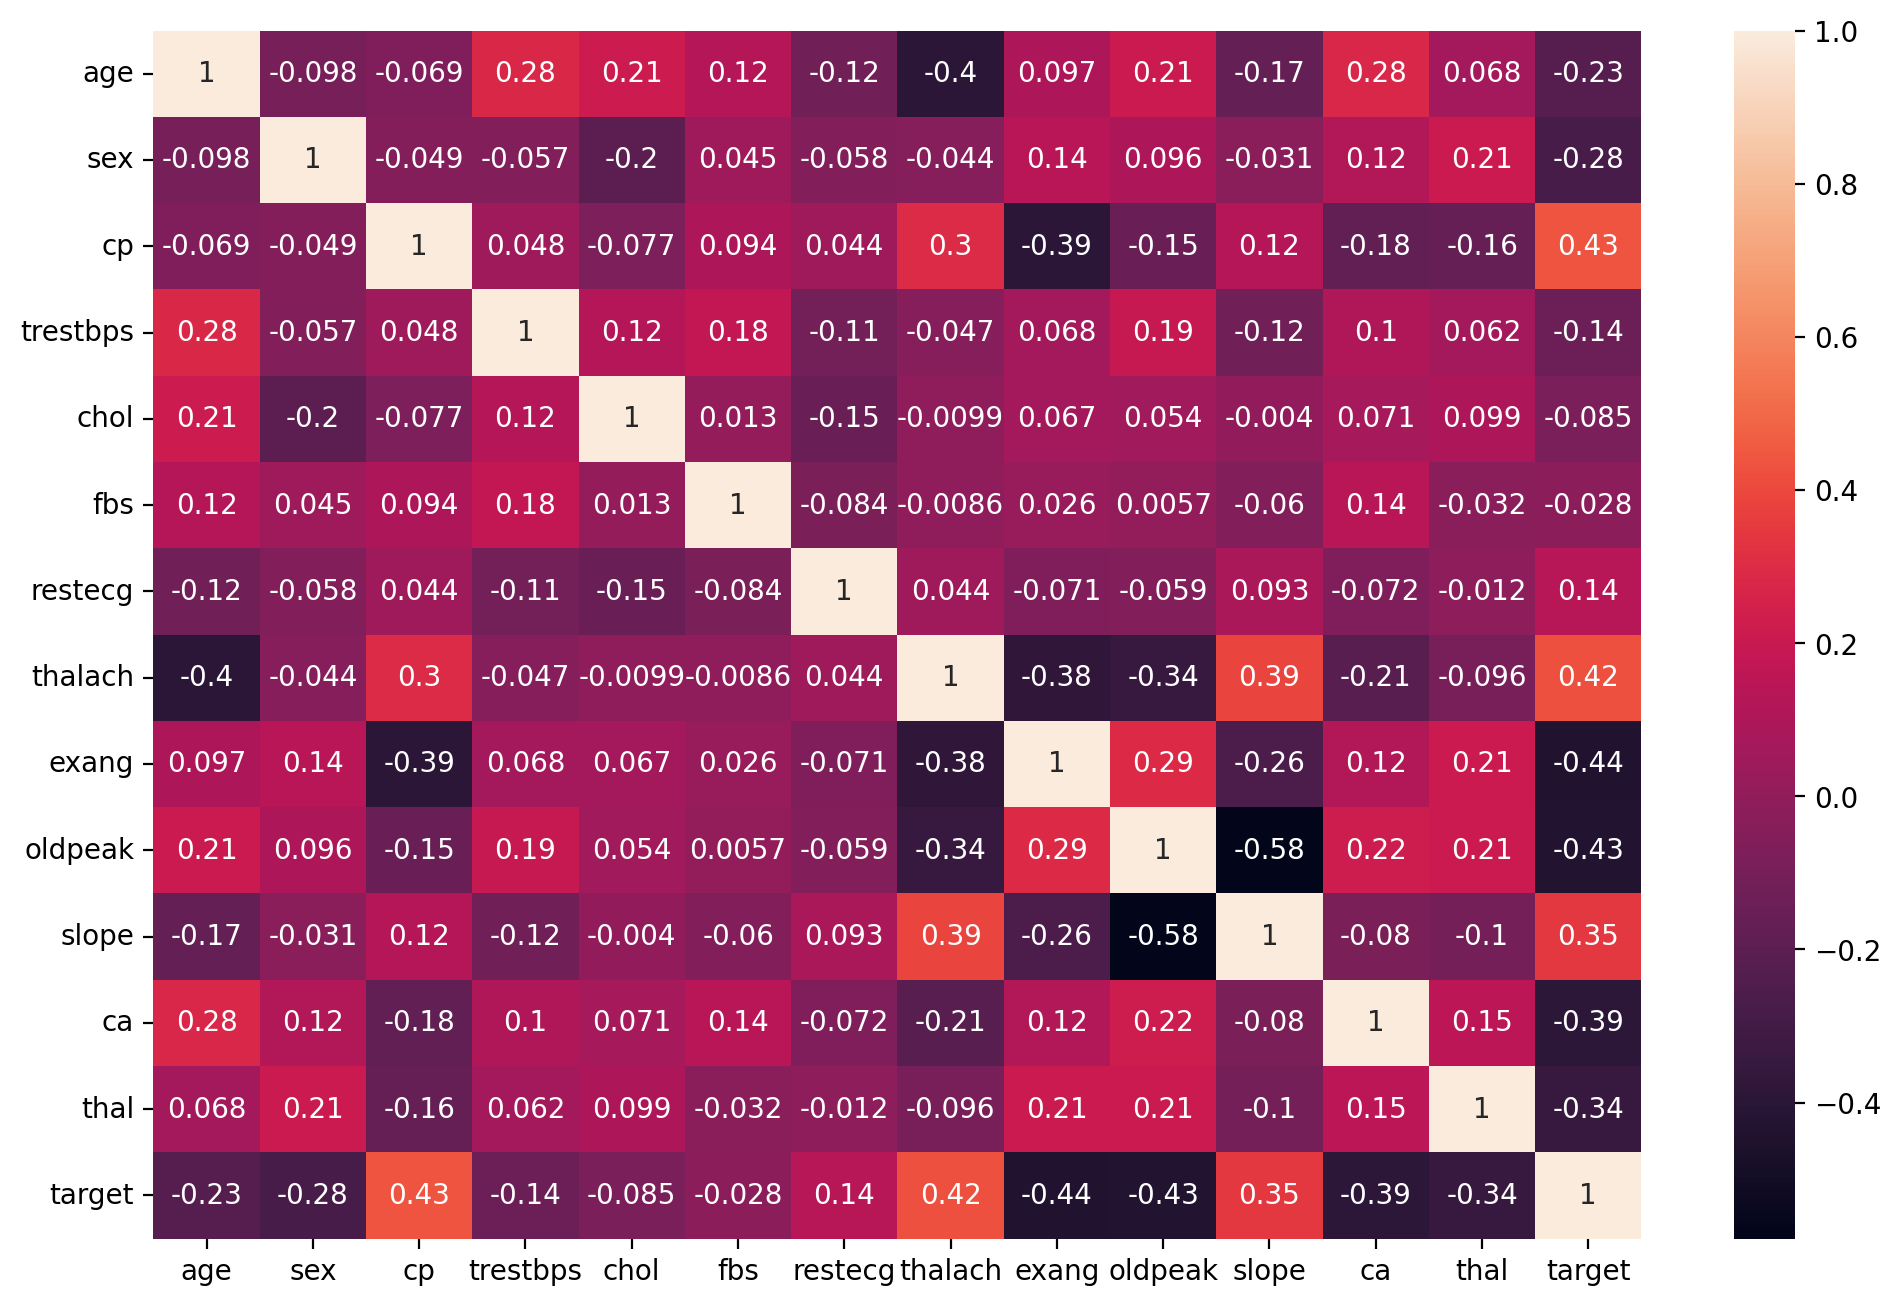

In [10]:
plt.figure(dpi=200,figsize=(12,8))
sns.heatmap(df.corr(),annot=True);

### Train | Test  split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state=101)

### Scalling the Data

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
scaled_X_train = scaler.transform(X_train)

In [15]:
scaled_X_test = scaler.transform(X_test)

### Calling Logistic Regression From linear model

In [16]:
log_model = LogisticRegression(solver ='saga',max_iter=1000)

### Initiating Grid Search for best Hyper perameters 

In [17]:
param_grid= {'C':[0.1,0.3,0.8,0.9,1,10,20,50,70,100],
            'penalty':['elasticnet'],'l1_ratio':[0,0.01,0.1,0.6,0.8,0.9,1]}

In [18]:
grid_model = GridSearchCV(log_model,param_grid=param_grid,cv=10)

In [19]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': [0.1, 0.3, 0.8, 0.9, 1, 10, 20, 50, 70, 100],
                         'l1_ratio': [0, 0.01, 0.1, 0.6, 0.8, 0.9, 1],
                         'penalty': ['elasticnet']})

### Choosing Best Hyperparamitor

In [20]:
grid_model.best_params_

{'C': 0.8, 'l1_ratio': 0.8, 'penalty': 'elasticnet'}

In [21]:
y_pred = grid_model.predict(scaled_X_test)

### Checking worthness of logistic Regression model With various way

In [22]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [23]:
accuracy_score(y_test,y_pred)

0.8387096774193549

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



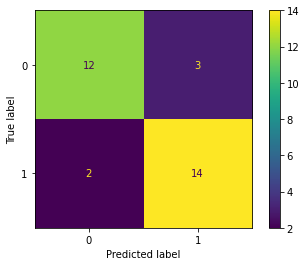

In [25]:
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test);

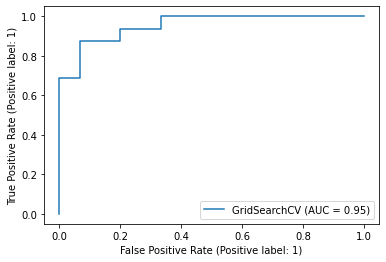

In [26]:
RocCurveDisplay.from_estimator(grid_model,scaled_X_test,y_test);

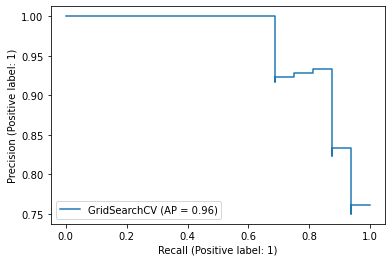

In [27]:
PrecisionRecallDisplay.from_estimator(grid_model,scaled_X_test,y_test);

## Checking Prediction Capability of model Giveing test

------

In [28]:
columns = list(df.columns)

In [29]:
columns.remove('target')

In [30]:
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [31]:
patient = pd.DataFrame(  np.array([[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]),columns = columns)

In [32]:
patient

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,54.0,1.0,0.0,122.0,286.0,0.0,0.0,116.0,1.0,3.2,1.0,2.0,2.0


In [33]:
X_new=scaler.transform(patient)

In [34]:
grid_model.predict(X_new)

array([0], dtype=int64)

-------------------

### Relationship Between the Coefficients

In [35]:
log_model = LogisticRegression(solver ='saga',max_iter=1000,C=0.8,
            penalty='elasticnet',l1_ratio=0.8)

In [36]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression(C=0.8, l1_ratio=0.8, max_iter=1000, penalty='elasticnet',
                   solver='saga')

In [37]:
z = log_model.coef_[0]

In [38]:
z = pd.Series(index=X.columns,data=z)

In [39]:
z = z.sort_values()

In [40]:
z.index

Index(['ca', 'sex', 'thal', 'oldpeak', 'exang', 'trestbps', 'chol', 'age',
       'fbs', 'restecg', 'slope', 'thalach', 'cp'],
      dtype='object')

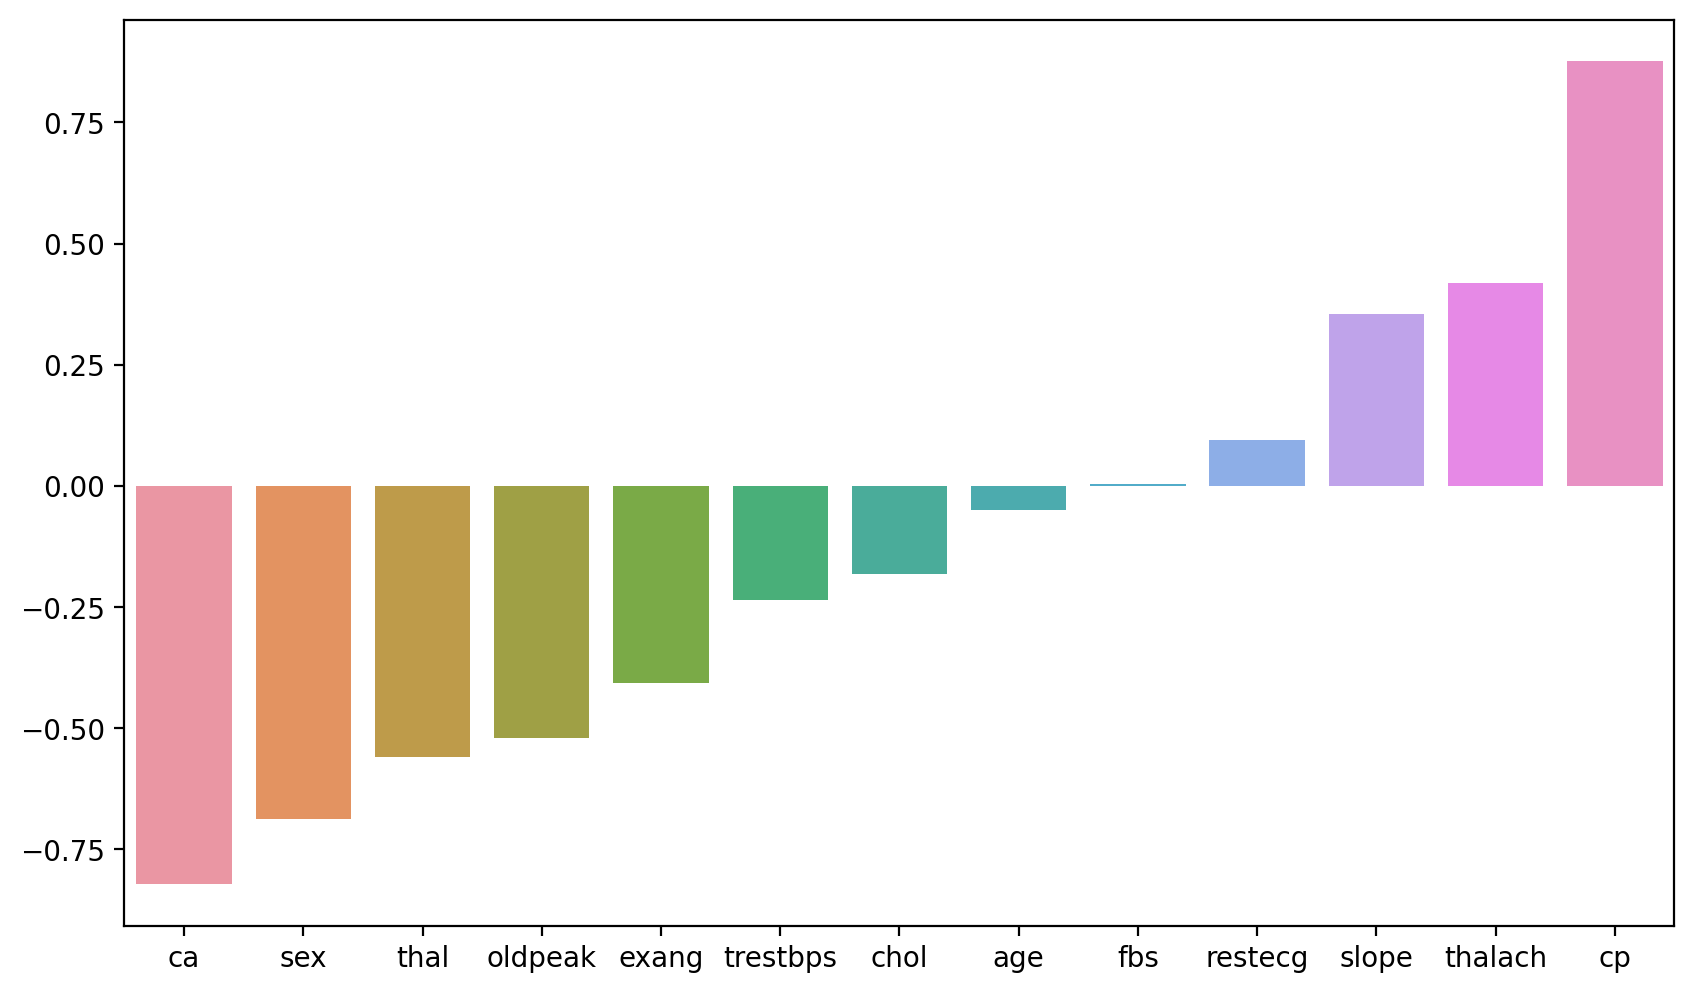

In [41]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(x=z.index,y=z.values);

## Job done!

------------------